In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
# 도미, 빙어 데이터

In [3]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])
# numpy import후 리스트 연결, 확인

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [4]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


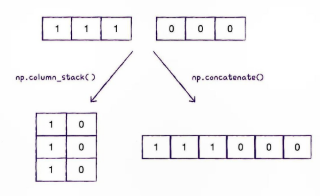

In [5]:
from sklearn.model_selection import train_test_split
# train_test_split() > 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어주는 함수, 나누기 전에 알아서 섞어줌

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [6]:

print(train_input.shape, test_input.shape) # 입력데이터

(36, 2) (13, 2)


In [7]:
print(train_target.shape, test_target.shape) # 타깃데이터

(36,) (13,)


넘파이 배열의 크기는 파이썬의 튜플로 표현됨  
튜플의 원소가 하나면 원소 뒤에 콤마를 추가함(타깃 데이터는 1차원 배열이므로 원소가 하나인 튜플로 표현)

In [8]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


무작위로 데이터를 나누었을 때 샘플이 골고루 섞이지 않을 수 있음  
특히 일부 클래스의 개수가 적을 때 많이 발생  
[해결방법]  
train_test_split() 함수의 stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눔  
훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 특히 유용

In [9]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier # k-최근접 이웃
kn = KNeighborsClassifier()
kn.fit(train_input, train_target) # 훈련
kn.score(test_input, test_target) # 모델평가

1.0

In [ ]:
print(kn.predict([[25,150]])) # 도미 데이터 결과확인

[0.]


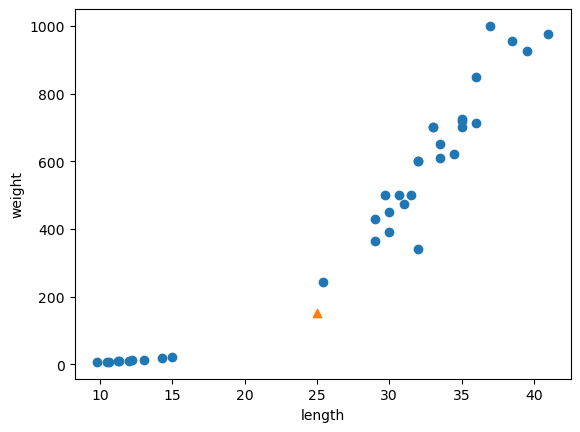

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 주어진 샘플을 다른 데이터와 함께 산점도로 그림

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]])
# kneighbors() > 주어진 샘플에서 가장 가까운 이웃을 찾아줌
# 이웃까지의 거리와 이웃 샘플의 인덱스 반환
# 기본값은 5

Text(0, 0.5, 'weight')

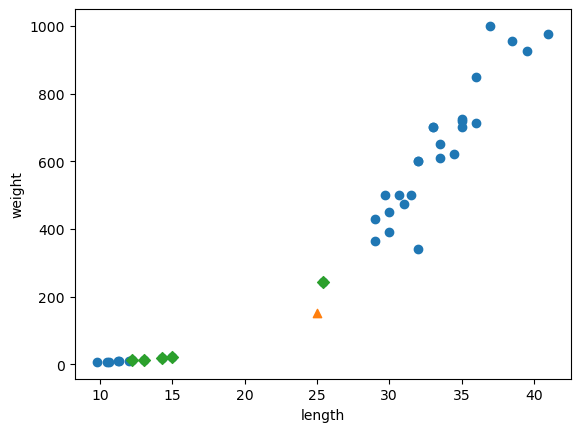

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')

In [15]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [16]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


샘플 데이터와 가장 가까운 5개 중 4개가 빙어(0)인 것을 확인

In [17]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


x축과 y축의 범위 달라서 나타나는 현상

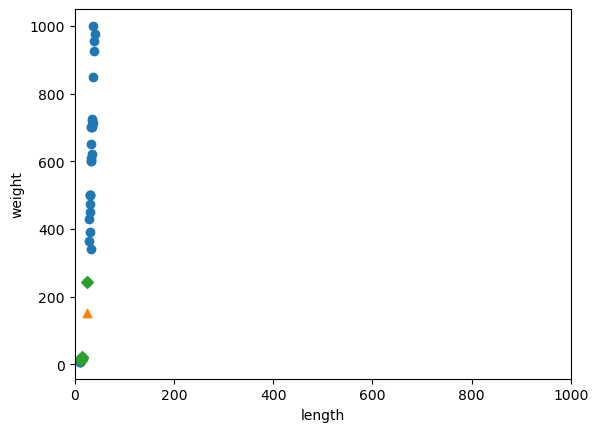

In [20]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000)) # x축 범위지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

알고리즘이 거리 기반일 때 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없음  
> 데이터 전처리 필요(특성값을 일정한 기준으로 맞춰주어야 함)  

'표준점수(z점수)'  
- 대표적 전처리 방법 중 하나  
- 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타냄  
분산: (데이터 - 평균)^2의 평균   
표준편차: 분산의 제곱근

[참고]  
모든 알고리즘이 거리를 기반으로 하는 것은 아님  
트리 기반 알고리즘들은 특성의 스케일이 다르더라도 잘 동작함

In [22]:
mean = np.mean(train_input, axis = 0) # 평균계산
std = np.std(train_input, axis = 0) # 표준편차 계산

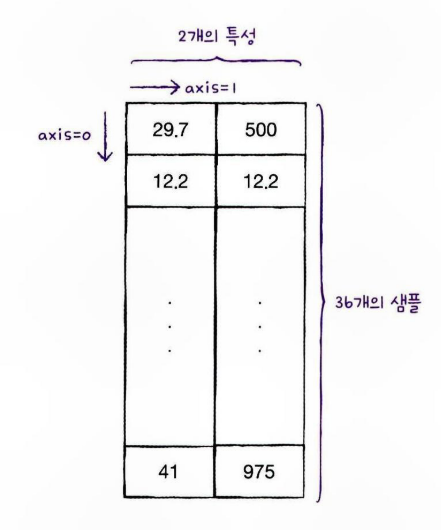

axis = 0 > 행을 따라 각 열의 통계 값을 계산

In [23]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
train_scaled = (train_input - mean) / std
# 표준점수 = (데이터-평균) / 표준편차

넘파이 '브로드캐스팅' 기능  
: 넘파이 배열의 모든 행에서 평균, 표준편차를 적용해 계산해줌

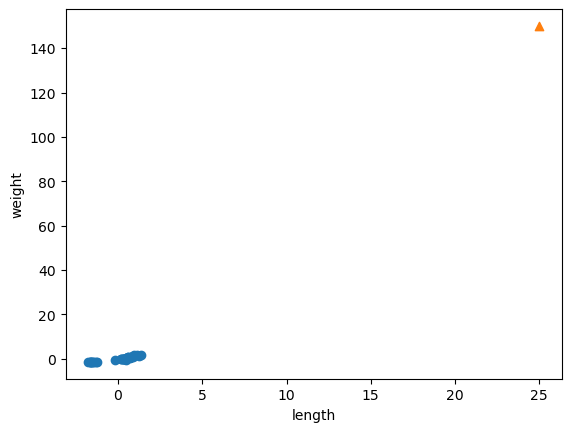

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 표준점수로 변환한 train_scaled 산점도로 표시

In [ ]:
샘플을 동일한 비율로 변환하지 않아 생기는 결과  
> 훈련 세트의 mean, std를 이용해서 변환해야 함

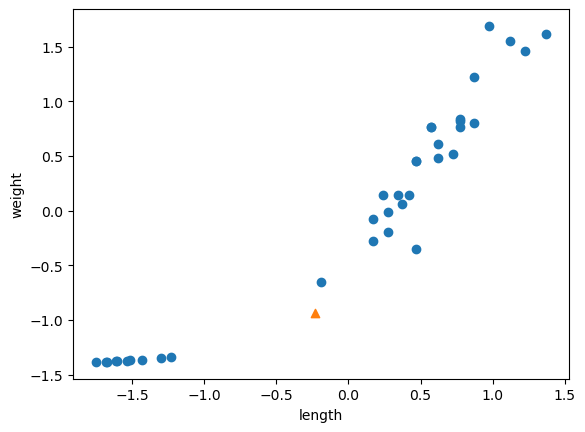

In [27]:
new = ([25,150]- mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [29]:
kn.fit(train_scaled, train_target) # 변환한 데이터셋으로 훈련

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
test_scaled = (test_input - mean)/std # 테스트 스케일 변환

In [ ]:
kn.score(test_scaled, test_target) # 모델 평가

1.0

In [32]:
print(kn.predict([new]))

[1.]


도미(1)로 예측함

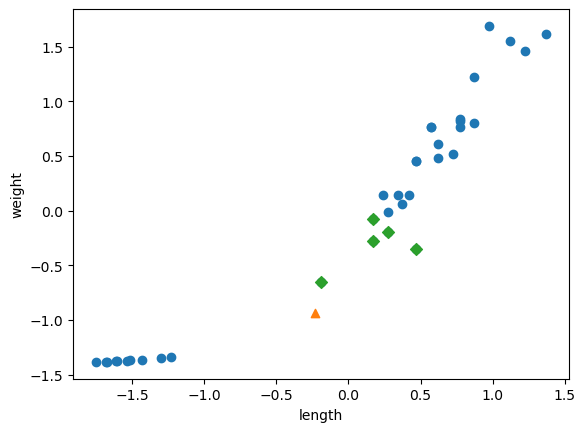

In [34]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

특성의 스케일을 조정하는 방법은 많지만 대부분의 경우 표준점수로 충분하며, 가장 널리 사용됨  
[주의]  
훈련 세트를 변환한 방식 그대로 테스트 세트를 변환해야 함